<a href="https://colab.research.google.com/github/PerdomoVergaraFernando/Ecuaciones-Diferenciales-Parciales-2/blob/main/Metodo_de_Gauss_Siedel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <font color = red>Metodo de Gauss-Siedel.
## <font color = purple> Tecnica interativa de Gauss-Siedel.

Para resolver $A$$x$ = b dada una aproximacion inicial $x^{(0)}$:

## <font color = green> Entrada:
el numero de ecuaciones y valores desconocidos $n$; $a_{ij}$, $1\leq i \leq n$ de la matriz $A$; las entradas $b_i$, $1\leq i \leq n$ de $\textbf{b}$; las entradas $X$$O_i$, $1\leq i \leq n$ de $\textbf{XO = $x^{(0)}$}$; tolerancia $\textbf{TOL}$; numero maximo de interaciones $N$.

## <font color = green> Salida:
la solucion aproximada $x_1,.....,x_n$ o un mensaje que indica que se excedio el numero de interciones.

Paso 1: Determine  $k$ = 1.

Paso 2: Mientras ($k \leq N $) haga los pasos 3-6

Paso 3: Para $i = 1,.....,n$

 determine $ x_i  = \frac{1}{a_{ij}} \cdot [- \sum_{j = 1 }^{i-1} a_ {ij}x_j - \sum_{j=i+1}^n a_{ij}\textbf{ X$O_j$} + b_i ]$

Paso 4: Si $ || \textbf{x - XO} || < \textbf{TOL}$ entonces Salida ($x_1,....,x_n$) (El procedimoento fue exitoso. PARE)

Paso 5: Determine $k = k+1$

Paso 6: Para $i=1,...,n$ determine $\textbf{X$O_i$} = x_i$.

Paso 7: Salida ('numero maximo de interacione excedido'):
                (El procedimoento no fue exitoso.)
                PARE.
        

In [14]:
import numpy as np  # libreria numpy: Para operaciones matriciales y matemáticas.
import pandas as pd # libreria pandas: Para crear y mostrar tablas con los resultados.

def gauss_seidel(A, b, X0, TOL, N):

    n = len(b)      # Obtener la dimensión del sistema
    x = X0.copy()   # Crear una copia del vector inicial para no modificar el original
    k = 1           # Inicia el conteo de iteraciones
    resultados = [] # Lista para almacenar los resultados de cada iteración (para la tabla final)


    while k <= N:                                 # Bucle principal de iteraciones
        x_anterior = x.copy()                     # Crear una copia de la aproximación anterior para calcular el error
        for i in range(n):                        # Calcular cada componente del nuevo vector solución
            suma = 0                              # Inicializar la suma de los términos
            for j in range(i):                    # Suma de los términos con los valores ya actualizados (j < i)
                suma += A[i, j] * x[j]
            for j in range(i + 1, n):             # Suma de los términos con los valores aún no actualizados (j > i)
                suma += A[i, j] * x_anterior[j]
            x[i] = (b[i] - suma) / A[i, i]        # Calcular el nuevo valor para x_i usando la fórmula de Gauss-Seidel

        diferencia = np.linalg.norm(x - x_anterior, np.inf) # Calcular el error, por la norma infinita de la diferencia entre la aproximación actual y la anterior

        resultados.append([k] + list(x.copy()) + [diferencia]) # Almacenar los resultados de esta iteración para la tabla final


        if diferencia < TOL:                                                             # Verificar criterio de convergencia
            columnas = ['Iteración'] + [f'x{i+1}' for i in range(n)] + ['Error']         # Las columnas son: Iteración, x1, x2, ..., xn, Error
            df = pd.DataFrame(resultados, columns=columnas)                              # Crear y mostrar tabla con los resultados de todas las iteraciones
            print(df.to_string(index=False, float_format=lambda x: '{:.6f}'.format(x)))  # Mostrar la tabla sin índices
            return x                                                                     # Retornar la solución aproximada

        # Contador de iteraciones
        k += 1

    columnas = ['Iteración'] + [f'x{i+1}' for i in range(n)] + ['Error']                      # Si se excede el número máximo de iteraciones sin converger
    df = pd.DataFrame(resultados, columns=columnas)                                           # Crear y mostrar tabla con los resultados de todas las iteraciones
    print(df.to_string(index=False, float_format=lambda x: '{:.6f}'.format(x)))               # Mostrar la tabla
    print(f"\nNúmero máximo de iteraciones ({N}) excedido. El procedimiento no fue exitoso.") # Mensaje de no convergencia
    return None                                                                               # Retornar None para indicar que no se alcanzó la convergencia

# Ejemplo de uso del método de Gauss-Seidel, con el ejercicio visto en clase
if __name__ == "__main__":
    A = np.array([[4, -1, 0, -1, 0, 0, 0, 0, 0],                       # Matriz de coeficientes
                  [-1, 4, -1, 0,-1, 0, 0, 0, 0],
                  [ 0,-1, 4, 0, 0, -1, 0, 0, 0],
                  [-1, 0, 0, 4, -1, 0,-1, 0, 0],
                  [ 0,-1, 0,-1, 4, -1, 0,-1, 0],
                  [ 0, 0, -1, 0,-1, 4, 0, 0,-1],
                  [ 0, 0, 0, -1, 0, 0, 4,-1, 0],
                  [ 0, 0, 0, 0,-1, 0, -1, 4,-1],
                  [ 0, 0, 0, 0, 0, -1, 0,-1, 4]])

    b = np.array([0, 0, 3/4, 0, 0, 1,  1/2, 1, 5/4])                # Vector de términos independientes
    X0 = np.array([9/32, 9/32, 9/32, 9/32, 9/32, 9/32, 9/32 , 9/32, 9/32])          # Aproximación inicial
    TOL = 1e-4                                       # Tolerancia para el criterio de convergencia "ERROR"
    N = 50                                          # Número máximo de iteraciones permitidas

    # Llamar a la función gauss_seidel para resolver el sistema
    print("Resolviendo el sistema usando el método de Gauss-Seidel:\n")
    print("Sistema de ecuaciones:\n")
    print("         4x1 -  x2      - x4                             =  0")
    print("         -x1 + 4x2 -  x3     - x5                        =  0")
    print("             -  x2 + 4x3          -  x6                  = 3/4")
    print("         -x1           + 4x4 - x5      -  x7             =  0")
    print("              -x2       - x4 +4x5 -  x6      -  x8       =  0")
    print("                    - x3     - x5 + 4x6            - x9  =  1")
    print("                        - x4           + 4x7 -  x8       = 1/2")
    print("                             - x5      -  x7 + 4x8 -  x9 =  1  ")
    print("                                  -  x6      -  x8 + 4x9 = 5/4\n")
    print(f"Aproximación inicial: {X0}")
    print(f"Tolerancia: {TOL}")
    print(f"Máximo de iteraciones: {N}")
    print("\nProgreso de las iteraciones:\n")

    solucion = gauss_seidel(A, b, X0, TOL, N)

    # Mostrar la solución si se encontró
    if solucion is not None:
        print(f"\nSolución aproximada:\n")
        print(f"X1 = {solucion[0]:.6f}")
        print(f"x2 = {solucion[1]:.6f}")
        print(f"X3 = {solucion[2]:.6f}")
        print(f"x4 = {solucion[3]:.6f}")
        print(f"x5 = {solucion[4]:.6f}")
        print(f"x6 = {solucion[5]:.6f}")
        print(f"x7 = {solucion[6]:.6f}")
        print(f"x8 = {solucion[7]:.6f}")
        print(f"x9 = {solucion[8]:.6f}")

Resolviendo el sistema usando el método de Gauss-Seidel:

Sistema de ecuaciones:

         4x1 -  x2      - x4                             =  0
         -x1 + 4x2 -  x3     - x5                        =  0
             -  x2 + 4x3          -  x6                  = 3/4
         -x1           + 4x4 - x5      -  x7             =  0
              -x2       - x4 +4x5 -  x6      -  x8       =  0
                    - x3     - x5 + 4x6            - x9  =  1
                        - x4           + 4x7 -  x8       = 1/2
                             - x5      -  x7 + 4x8 -  x9 =  1  
                                  -  x6      -  x8 + 4x9 = 5/4

Aproximación inicial: [0.28125 0.28125 0.28125 0.28125 0.28125 0.28125 0.28125 0.28125 0.28125]
Tolerancia: 0.0001
Máximo de iteraciones: 50

Progreso de las iteraciones:

 Iteración       x1       x2       x3       x4       x5       x6       x7       x8       x9    Error
         1 0.140625 0.175781 0.301758 0.175781 0.228516 0.452881 0.239258 0.43725

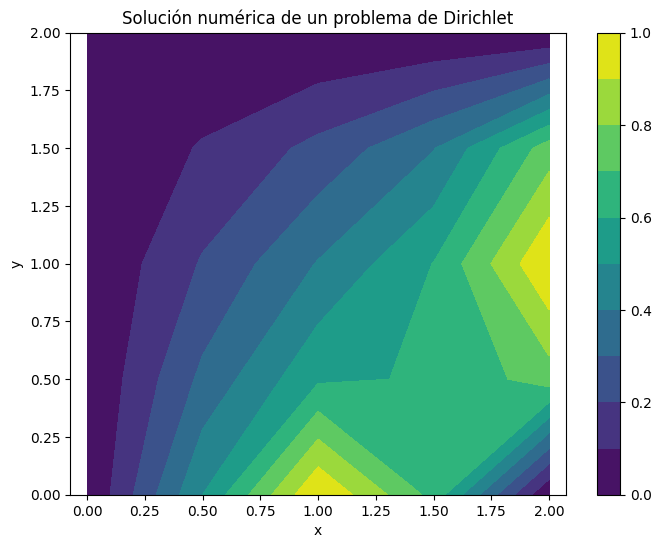

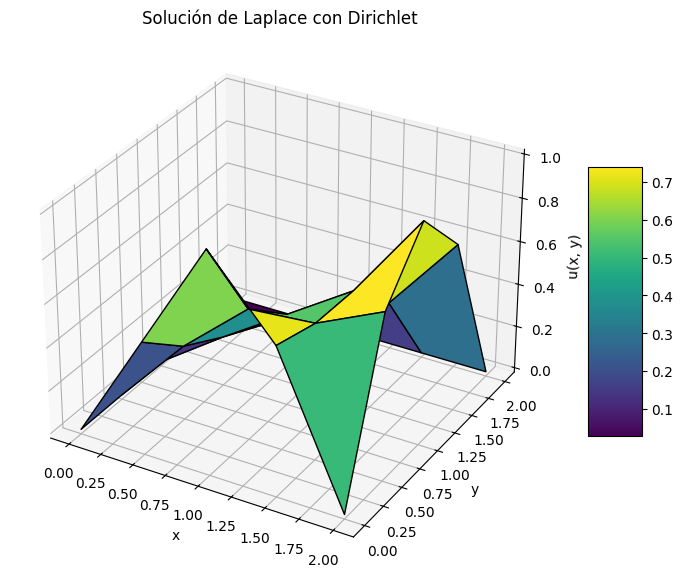

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # necesario para 3D
from matplotlib import cm  # colormap

U=np.array([[0,1/2,1,2/3,0],
            [0,0.323634,0.584794,0.609362,3/4],
            [0,0.209768,0.406196,0.602652,1],
            [0,0.109321,0.227625,0.395062 ,3/4],
            [0,0,0,0,0]])

# Changed to 5 points to match the shape of U
x = np.linspace(0, 2, 5)
y = np.linspace(0, 2, 5)
X, Y = np.meshgrid(x, y)

# Mapa de colores
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, U, levels=10, cmap=cm.viridis)
plt.colorbar(contour)
plt.title('Solución numérica de un problema de Dirichlet')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.show()


fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, U, cmap=cm.viridis, edgecolor='k')
ax.set_title('Solución de Laplace con Dirichlet')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()